## Random and Pseudorandom Numbers

Perhaps, the easiest way to generate bits that *look* random is to use the `randint` function from the `random` module in `Python`. The call `randint(a, b)` returns some integer in $\{\texttt{a},\ldots,\texttt{b}\}$.

In [1]:
from random import randint

print(*[randint(0, 1) for _ in range(30)], sep='')

101101010110001111001010001101


If you run the same code again, you get different bits. However, these bits are obtained *not* by a random process but by some algorithm. This algorithm takes a *seed* and then generates a sequence of bits that depends on the seed in a rather complicated way — chosen in such a way that is difficult to distinguish this sequence from randomly generated bits (if you do not know the seed). 

We may specify the seed explicitly. Let us add a call `seed(29)` to our previous code.

In [2]:
from random import randint, seed

seed(29)
print(*[randint(0, 1) for _ in range(30)], sep='')

011011100010101110100110111011


Then, each time you run this code, you get exactly the same thirty bits! This behavior of pseudorandom generators
is useful in practice. If you debug some algorithm that uses random bits, and some error happens, you want the error to be reproducible. For that, you need to run the algorithm again with the same bits, and you achieve this by using the same seed.

On the other hand, if you do not use this feature, the bit generator uses some seed that depends on time, so you will get new bits when you run the program again. There are good chances that you will never find out any difference between *pseudorandom* bits generated by `Python` and randomly generated bits when playing with simple programs, so we use pseudorandom bits a lot in this book (as if they were random) and encourage you to do the same — unless you need random bits for serious applications (especially, cryptographic ones).

## Frequency of Tails

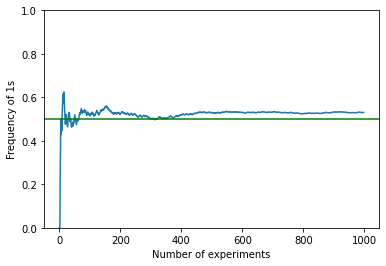

In [3]:
import matplotlib.pyplot as plt
from random import randint, seed

# toss a coin many times
seed(19)
num_experiments = 1000
tosses = [randint(0, 1) for _ in range(num_experiments)]
frequencies = [sum(tosses[:i]) / i for i in range(1, num_experiments)]

# plot
plt.plot(frequencies)
plt.ylabel(ylabel='Frequency of 1s')
plt.xlabel(xlabel='Number of experiments')
plt.ylim(bottom=0, top=1)
plt.axhline(y=0.5, color='green')
plt.savefig('freq.png')

## Galton Board

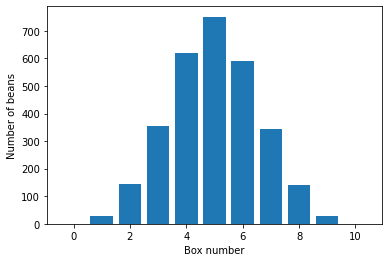

In [4]:
import matplotlib.pyplot as plt
from random import randint, seed

seed(29)

num_layers = 10
num_beans = 3000


def get_random_box():
    return sum([randint(0, 1) for _ in range(num_layers)])


counts = [0] * (num_layers + 1)
for _ in range(num_beans):
    counts[get_random_box()] += 1


plt.bar(range(num_layers + 1), counts)
plt.ylabel(ylabel='Number of beans')
plt.xlabel(xlabel='Box number')
plt.savefig('galton.png')

It is instructive to compare simulation results with our mathematical analysis. We computed the fraction of beans that should end in each box if the flow of beans is divided evenly at every splitting point.  The program below 
adds dots that show the result of this computation; the function `comb(num_layers, i)` from the `math` module computes the binomial coefficients (numbers from Pascal's triangle). One could see that the blue bars (simulation results) are quite close to them.

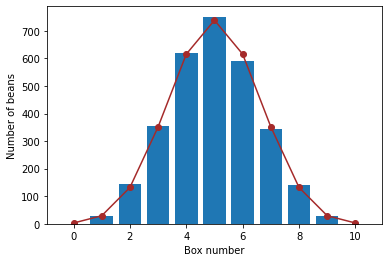

In [5]:
from math import comb
import matplotlib.pyplot as plt
from random import randint, seed

seed(29)

num_layers = 10
num_beans = 3000


def get_random_box():
    return sum([randint(0, 1) for _ in range(num_layers)])


counts = [0] * (num_layers + 1)
for _ in range(num_beans):
    counts[get_random_box()] += 1

theory_counts = [num_beans * comb(num_layers, i) / 2 ** num_layers for i in range(num_layers + 1)]

plt.bar(range(num_layers + 1), counts)
plt.plot(theory_counts, 'o-', color='brown')
plt.ylabel(ylabel='Number of beans')
plt.xlabel(xlabel='Box number')
plt.savefig('galton10-3000-2.png')

## Two Problems

**Problem.** Six people, including Alice, Bob, and Charlie, form a queue in a random order.
 * What is the probability of the event "Alice is the first in the queue"?
 * What is the probability of the event "Alice precedes Bob in the queue"? (This means that Alice is closer to the start of the queue than Bob; there may be other people between them, or before/after them)
 * What is the probability of the event "Bob is between Alice and Charlie in the queue"? (Alice may be before or after Charlie, and Alice and Charlie may not be next to Bob.)
 * What is the probability of the event "Alice and Bob are neighbors in the queue"? (This means that Alice stays right before Bob or just after Bob).

**Problem.** There are two boxes and six balls labeled $0,1,2,3,4,5$. The balls $0$ and $1$ are placed in one box and the balls $2,3,4,5$ are placed in the other box. You choose randomly one of the boxes (they look identical) and take a random ball from this box. Which ball has more chances to be chosen: $1$ or $4$?


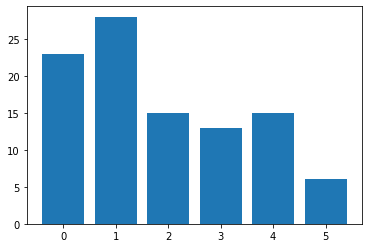

In [6]:
import matplotlib.pyplot as plt
from random import randint, seed

seed(27)

num_experiments = 100
count = [0] * 6

for _ in range(num_experiments):
    box = randint(0, 1)
    if box == 0:
        ball = randint(0, 1)
    else:
        ball = randint(2, 5)
    count[ball] += 1

plt.bar(range(6), count)
plt.savefig('twourns.png')

**Problem.** Take three random points on a plane. What is the probability that they form (are vertices of) an acute triangle? (Acute triangle has all angles less than $90^\circ$; right triangle has one angle $90^\circ$, and obtuse triangle has one angle greater than $90^\circ$.)

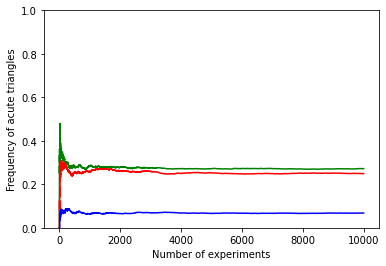

In [7]:
from random import random, seed
import matplotlib.pyplot as plt

seed(37)


def distance_squared(a, b):
    return (a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2


def acute(a, b, c):
    sides_squared = [
        distance_squared(a, b),
        distance_squared(a, c),
        distance_squared(b, c)
    ]
    sides_squared = sorted(sides_squared)
    return sides_squared[0] + sides_squared[1] > sides_squared[2]


def random_point(width, height):
    return [random() * width, random() * height]


def frequency_acute(width, height, num_experiments):
    experiments = [1 if acute(
        random_point(width, height),
        random_point(width, height),
        random_point(width, height)) else 0
        for _ in range(num_experiments)
    ]

    return [sum(experiments[:i]) / i for i in range(1, num_experiments)]


plt.plot(frequency_acute(100, 100, 10000), color='green')
plt.plot(frequency_acute(210, 297, 10000), color='red')
plt.plot(frequency_acute(100, 500, 10000), color='blue')
plt.ylabel(ylabel='Frequency of acute triangles')
plt.xlabel(xlabel='Number of experiments')
plt.ylim(bottom=0, top=1)
plt.savefig('freq_acute.png')        


## Monty Hall Paradox

In [8]:
from random import randint, seed

seed(96)


def initial_choice():
    return randint(1, 3)


def keep(choice, opened):
    return choice


def randomize(choice, opened):
    rooms = [1, 2, 3]
    rooms.remove(opened)
    return rooms[randint(0, 1)]


def change(choice, opened):
    return 6 - choice - opened


def success_frequency(strategy, num_experiments):
    num_wins = 0
    for _ in range(num_experiments):
        car = randint(1, 3)
        choice = initial_choice()

        if choice != car:
            opened = 6 - choice - car  # remaining
        else: # car = choice
            rooms = [1, 2, 3]
            rooms.remove(car)
            opened = rooms[randint(0, 1)]

        new_choice = strategy(choice, opened)

        if new_choice == car:
            num_wins += 1

    return num_wins / num_experiments


print(success_frequency(keep, 100000))
print(success_frequency(randomize, 100000))
print(success_frequency(change, 100000))


0.33161
0.4991
0.66682
